### Visualización

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns


import folium 
from folium.plugins import HeatMap

In [2]:
df = pd.read_csv('./iFlowDatos_Limpios.csv')
df.head()

iddomicilioorden   direccion                        provincia  municipio  \
0             74956  VIDAL 2044  Ciudad Autónoma de Buenos Aires  Comuna 13   
1             74956  VIDAL 2044  Ciudad Autónoma de Buenos Aires  Comuna 13   
2             74956  VIDAL 2044  Ciudad Autónoma de Buenos Aires  Comuna 13   
3             74956  VIDAL 2044  Ciudad Autónoma de Buenos Aires  Comuna 13   
4             74956  VIDAL 2044  Ciudad Autónoma de Buenos Aires  Comuna 13   

  localidad  InicioHorario1  FinHorario1    latitud   longitud  cliente  ...  \
0  Belgrano             901         1401 -34.564779 -58.459956       70  ...   
1  Belgrano             901         1401 -34.564779 -58.459956       70  ...   
2  Belgrano             901         1401 -34.564779 -58.459956       70  ...   
3  Belgrano             901         1401 -34.564779 -58.459956       70  ...   
4  Belgrano             901         1401 -34.564779 -58.459956       70  ...   

         VisitaPlanificada         InicioVisitaReal            FinVisitaReal  \
0  2024-05-23 12:06:00.000  2024-05-23 14:13:53.000  2024-05-23 14:14:53.000   
1  2024-05-10 12:05:00.000  2024-05-10 16:43:00.000  2024-05-10 16:43:00.000   
2  2024-05-30 12:03:00.000  2024-05-30 09:41:36.000  2024-05-30 09:50:08.000   
3  2024-06-13 12:14:00.000  2024-06-13 13:32:55.000  2024-06-13 13:39:55.000   
4  2024-06-27 12:27:00.000  2024-06-27 15:36:00.000  2024-06-27 15:36:00.000   

   VisitaPlanificadaFecha VisitaPlanificadaDia VisitaPlanificadaHora  \
0              2024-05-23             Thursday              12:06:00   
1              2024-05-10               Friday              12:05:00   
2              2024-05-30             Thursday              12:03:00   
3              2024-06-13             Thursday              12:14:00   
4              2024-06-27             Thursday              12:27:00   

  VisitaFecha VisitaDia VisitaHora_Inicio VisitaHora_Fin  
0  2024-05-23  Thursday          14:13:53       14:14:53  
1  2024-05-10    Friday          16:43:00       16:43:00  
2  2024-05-30  Thursday          09:41:36       09:50:08  
3  2024-06-13  Thursday          13:32:55       13:39:55  
4  2024-06-27  Thursday          15:36:00       15:36:00  

[5 rows x 24 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27484 entries, 0 to 27483
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   iddomicilioorden        27484 non-null  int64  
 1   direccion               27484 non-null  object 
 2   provincia               27484 non-null  object 
 3   municipio               27484 non-null  object 
 4   localidad               27484 non-null  object 
 5   InicioHorario1          27484 non-null  int64  
 6   FinHorario1             27484 non-null  int64  
 7   latitud                 27484 non-null  float64
 8   longitud                27484 non-null  float64
 9   cliente                 27484 non-null  int64  
 10  mes                     27432 non-null  object 
 11  Bultos                  27484 non-null  float64
 12  Peso                    27484 non-null  float64
 13  Unidades                27484 non-null  int64  
 14  VisitaPlanificada       27484 non-null

### Análisis Univariado

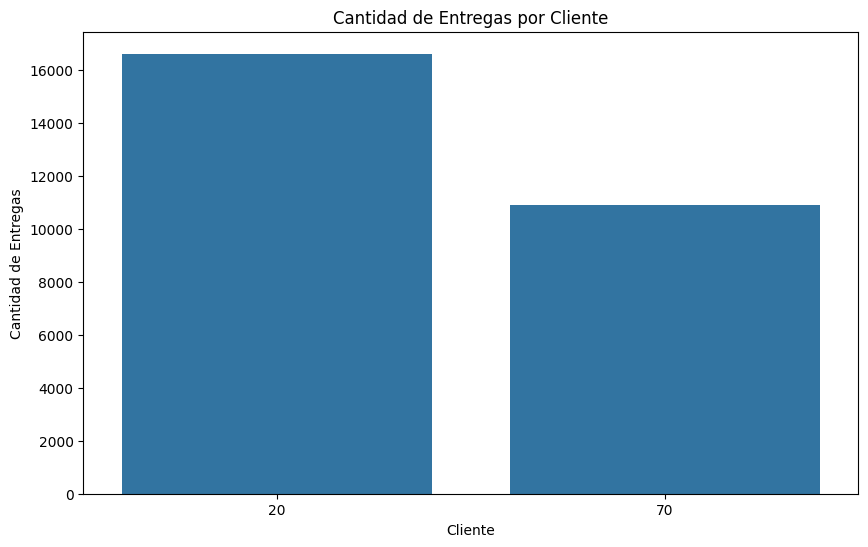

In [4]:
entregas_por_cliente = df.groupby('cliente').size().reset_index(name='cantidad_entregas')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='cliente', y='cantidad_entregas', data=entregas_por_cliente)

# Añadir etiquetas y título
plt.xlabel('Cliente')
plt.ylabel('Cantidad de Entregas')
plt.title('Cantidad de Entregas por Cliente')

# Mostrar el gráfico
plt.show()

Podemos ver que el cliente 20 en estos 3 meses tuvo 5000 pedidos mas que el cliente 70  

Hay una diferencia aproximada de 5000 entregas de diferencia entre clientes

C:\Users\PC\AppData\Local\Temp\ipykernel_1152\102872928.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  entregas_por_cliente_peso = df.groupby(['cliente', 'categoria_peso']).size().unstack(fill_value=0)


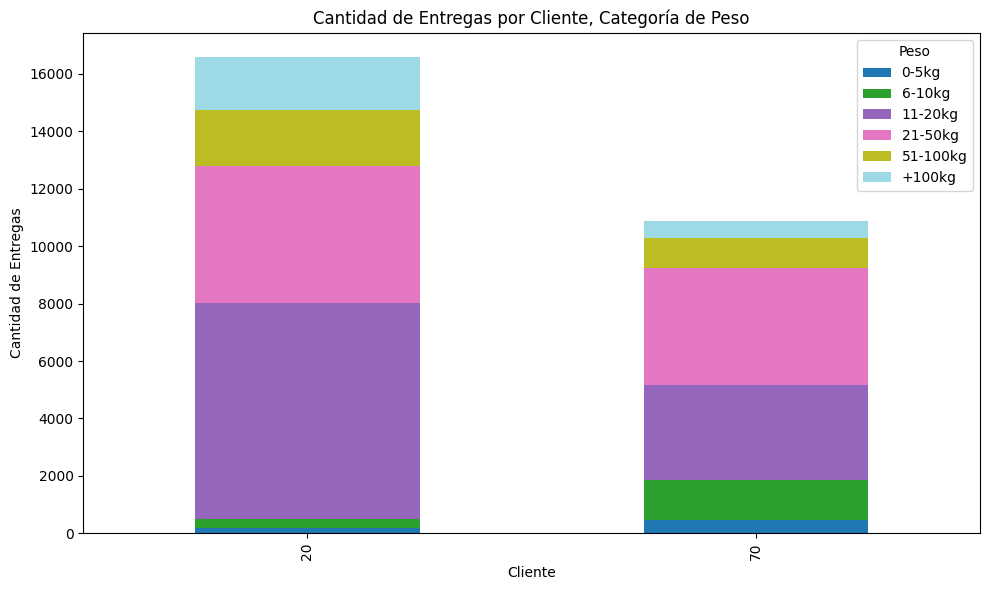

In [5]:
# Categorizar el peso en las clases mencionadas
bins = [0, 5, 10, 20, 50, 100, float('inf')]  # Límites de las categorías
labels = ['0-5kg', '6-10kg', '11-20kg', '21-50kg', '51-100kg', '+100kg']  # Etiquetas
df['categoria_peso'] = pd.cut(df['Peso'], bins=bins, labels=labels, right=False)

# Agrupar por cliente y categoría de peso, y contar las entregas
entregas_por_cliente_peso = df.groupby(['cliente', 'categoria_peso']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas
entregas_por_cliente_peso.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Añadir etiquetas y título
plt.xlabel('Cliente')
plt.ylabel('Cantidad de Entregas')
plt.title('Cantidad de Entregas por Cliente, Categoría de Peso')
plt.legend(title='Peso')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

La mayoria de los pedidos de ambos clientes rondan entre 10 a 100 kilos

C:\Users\PC\AppData\Local\Temp\ipykernel_1152\3872089311.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  entregas_por_peso_cliente = df.groupby(['categoria_peso', 'cliente']).size().unstack(fill_value=0)


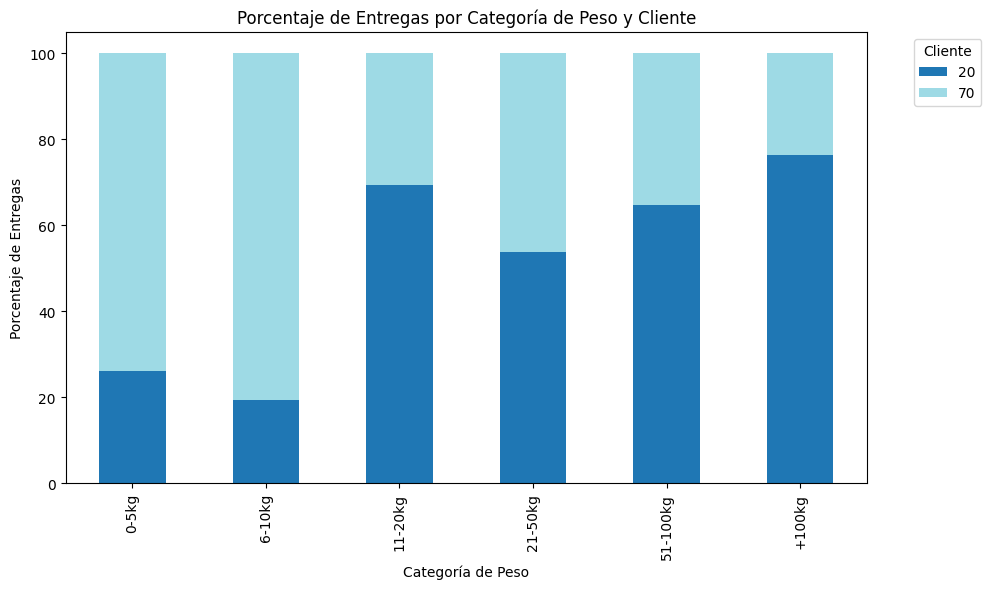

In [6]:
entregas_por_peso_cliente = df.groupby(['categoria_peso', 'cliente']).size().unstack(fill_value=0)

# Convertir a porcentajes por categoría de peso
entregas_por_peso_cliente_pct = entregas_por_peso_cliente.div(entregas_por_peso_cliente.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras apiladas
entregas_por_peso_cliente_pct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Añadir etiquetas y título
plt.xlabel('Categoría de Peso')
plt.ylabel('Porcentaje de Entregas')
plt.title('Porcentaje de Entregas por Categoría de Peso y Cliente')
plt.legend(title='Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Las categorias de pesos mas pesadas son, en promedio, mas pedidas por el cliente 20

C:\Users\PC\AppData\Local\Temp\ipykernel_1152\2603022804.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  entregas_por_cliente_peso = df.groupby(['cliente', 'categoria_peso']).size().unstack(fill_value=0)


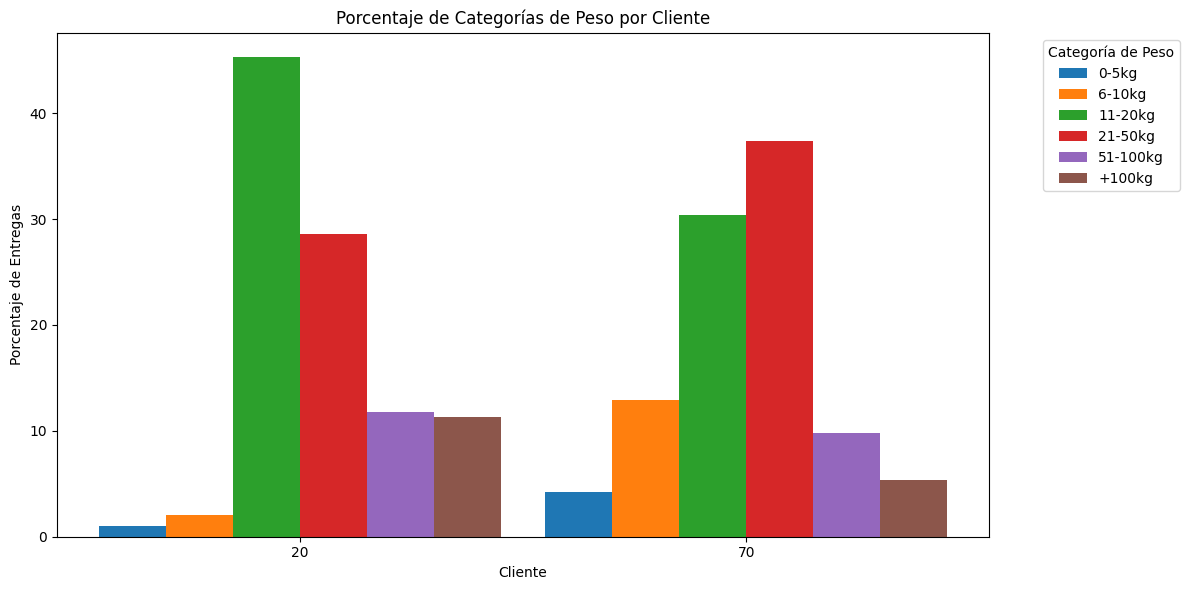

In [7]:
# Agrupar por cliente y categoría de peso, y contar las entregas
entregas_por_cliente_peso = df.groupby(['cliente', 'categoria_peso']).size().unstack(fill_value=0)

# Convertir a porcentajes por cliente
entregas_por_cliente_peso_pct = entregas_por_cliente_peso.div(entregas_por_cliente_peso.sum(axis=1), axis=0) * 100

# Crear las posiciones para cada barra agrupada
clientes = entregas_por_cliente_peso_pct.index
categorias_peso = entregas_por_cliente_peso_pct.columns
n_clientes = len(clientes)
n_categorias = len(categorias_peso)
bar_width = 0.15  # Ancho de cada barra
r = np.arange(n_clientes)  # Posiciones de los clientes en el eje x

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 6))

for i, categoria in enumerate(categorias_peso):
    plt.bar(r + i * bar_width, entregas_por_cliente_peso_pct[categoria], width=bar_width, label=categoria)

# Añadir etiquetas y título
plt.xlabel('Cliente')
plt.ylabel('Porcentaje de Entregas')
plt.title('Porcentaje de Categorías de Peso por Cliente')
plt.xticks(r + bar_width * (n_categorias - 1) / 2, clientes)  # Ajustar las posiciones del eje x para los clientes
plt.legend(title='Categoría de Peso', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

- Podemos ver que la mayoria de entregas de cada cliente rondan entre los 11-50 kilos
- el cliente 20 no suele tener pedidos menores a 10kg
- Mientras que el cliente 70 tiende a tener pedidos livianos como tambien pesados

La mayoria de entregas para ambos clientes varian entre 10-50kg

C:\Users\PC\AppData\Local\Temp\ipykernel_1152\1453322605.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  entregas_por_cliente_peso = df.groupby(['provincia', 'categoria_peso']).size().unstack(fill_value=0)


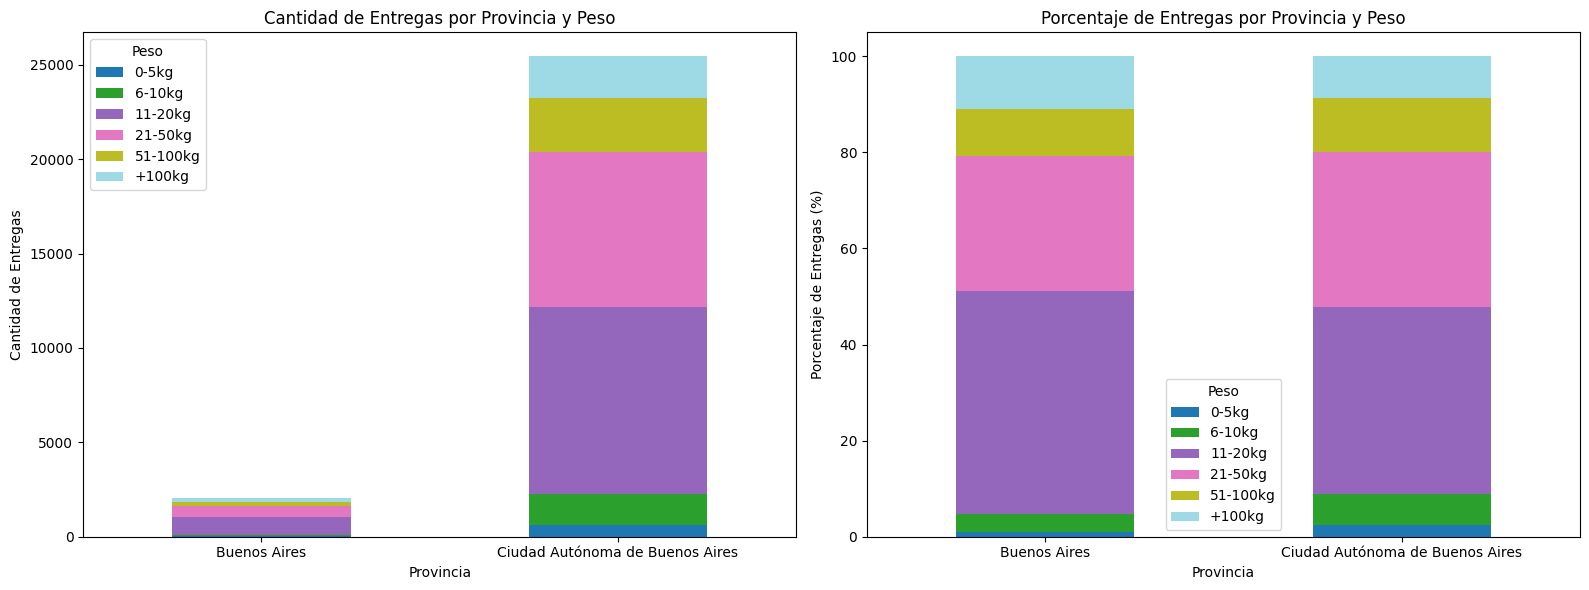

In [8]:


# Agrupar por provincia y categoría de peso, y contar las entregas
entregas_por_cliente_peso = df.groupby(['provincia', 'categoria_peso']).size().unstack(fill_value=0)

# Crear los subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Cantidad de entregas por provincia y categoría de peso (gráfico original)
entregas_por_cliente_peso.plot(kind='bar', stacked=True, ax=axes[0], colormap='tab20')
axes[0].set_xlabel('Provincia')
axes[0].set_ylabel('Cantidad de Entregas')
axes[0].set_title('Cantidad de Entregas por Provincia y Peso')
axes[0].legend(title='Peso')
axes[0].tick_params(axis='x', rotation=0)

# Gráfico 2: Porcentaje de entregas por provincia y categoría de peso
# Calcular porcentajes
porcentaje_entregas = entregas_por_cliente_peso.div(entregas_por_cliente_peso.sum(axis=1), axis=0) * 100

# Crear gráfico de barras apiladas para porcentajes
porcentaje_entregas.plot(kind='bar', stacked=True, ax=axes[1], colormap='tab20')
axes[1].set_xlabel('Provincia')
axes[1].set_ylabel('Porcentaje de Entregas (%)')
axes[1].set_title('Porcentaje de Entregas por Provincia y Peso')
axes[1].legend(title='Peso')
axes[1].tick_params(axis='x', rotation=0)

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()

- CABA tiene significativamente más pedidos que provincia
- Pesos mayores a 51 kilos tienen su porcentaje considerable de pedidos
- A pesar de la diferencia entre cantidad de entregas las proporciones de los pesos de los pedidos son muy similares
- Independientemente de la ubicacion, se mantiene una cierta homogeneidad en cuanto a las categorias de peso

### Análisis Bivariado

#### Relaciones entre Bulto,Peso y Unidades por Cliente

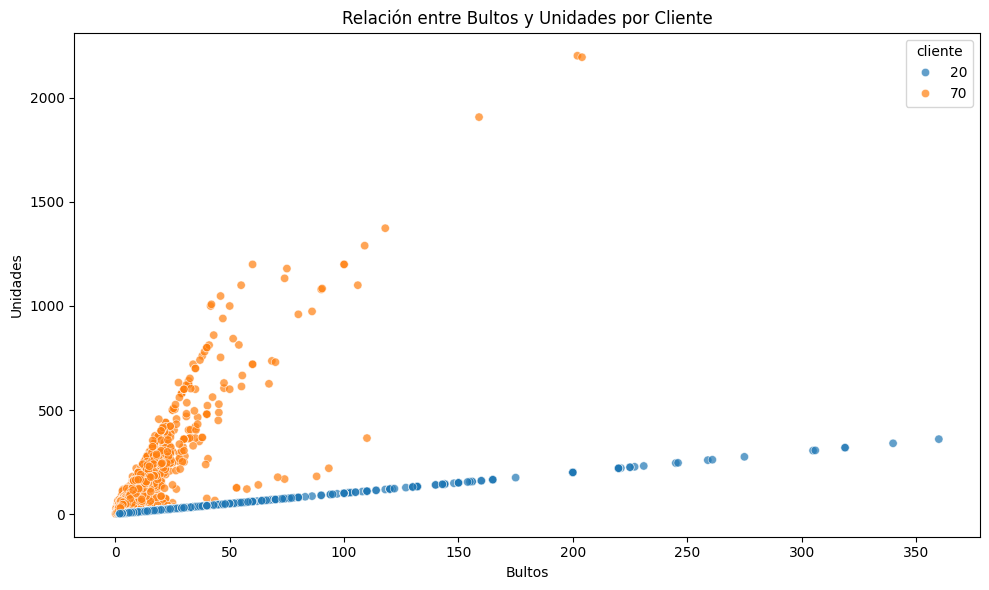

In [9]:
# Crear el scatter plot de Bultos vs Unidades, coloreado por cliente
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Bultos', y='Unidades', hue='cliente', palette='tab10', alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('Bultos')
plt.ylabel('Unidades')
plt.title('Relación entre Bultos y Unidades por Cliente')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Podemos ver una asociacion positiva entre unidades y bultos con una pendiente mucho mayor para el cliente 70 que el 20, aunque para el cliente 20 una gran cantidad de bultos no necesariamente esta relacionado con un alta cantidad de unidades
El cliente 70 tiene una tendencia de tener grandes unidades con pocos bultos, mientras que el cliente 20 tiene a tener grandes bultos con pocas unidades

En general, ambos clientes tienen comportamiento distintos:
- El cliente 20 tiende a hacer pedidos con una relacion mas alta de unidades con una mayor dispersion en los datos (debido posiblemente a distintos productos)
- El cliente 70 tiende a hacer pedidos con datos muy heteregeneos con mas bultos que unidades (puede deberse a que siempre pide productos similares o identicos)

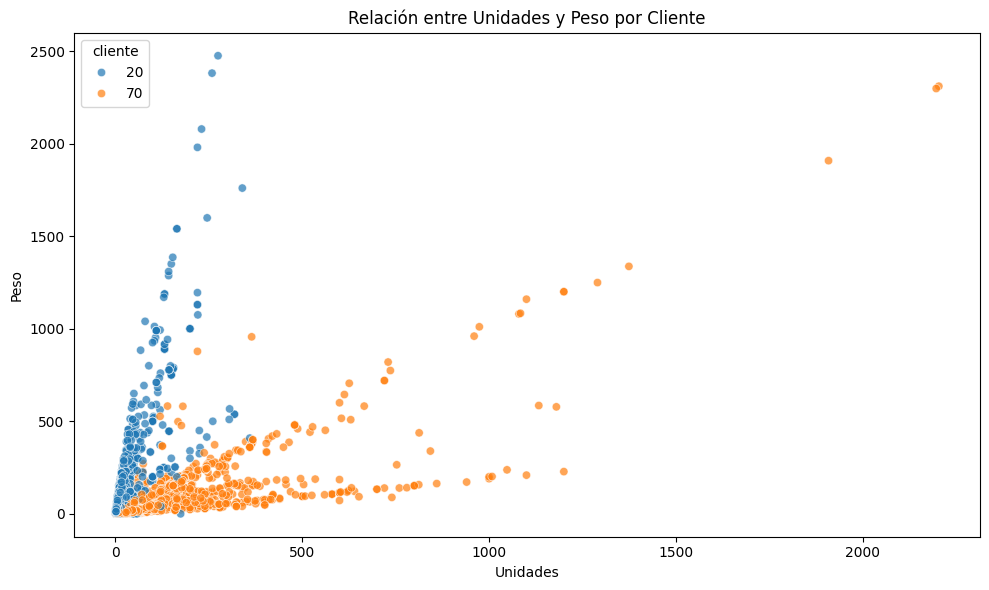

In [10]:
# Crear el scatter plot de Bultos vs Unidades, coloreado por cliente
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Unidades', y='Peso', hue='cliente', palette='tab10', alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('Unidades')
plt.ylabel('Peso')
plt.title('Relación entre Unidades y Peso por Cliente')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

El gráfico sugiere que los clientes tienen patrones logisticos distintos:
- El cliente 20 tiende a pedir productos mas pesados y en menor cantidades
- El cliente 70 tiende a pedir productos mas livianos y en mayor unidades 


En resumen:
- Cliente 20: Parece tener entregas mas uniformes y estructuradas especialmente por su relacion entre bultos y unidades sugiriendo que trabaja con productos mas homogeneos en tamaño y cantidad
- Cliente 70: Hay mayor variabilidad en este cliente, lo que nos sugiere que el cliente trabaja con productos mas heterogeneos en volumen y peso. Tambien maneja grandes cantidades de unidades sugiriendo que sus envios son grandes y voluminosos 

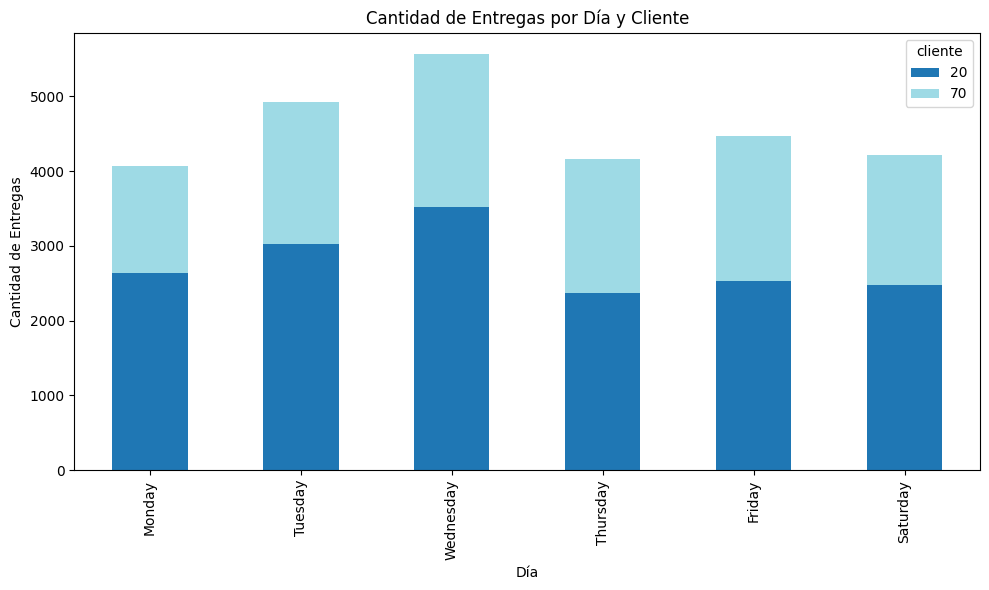

In [11]:
# Diccionario para definir el orden de los días de la semana
orden_dias = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5}

# Filtrar los registros donde 'VisitaDia' no sea 'Sunday'
df_sin_sunday = df[df['VisitaDia'] != 'Sunday']

# Agrupar por día y cliente, y contar las entregas
entregas_por_dia_cliente = df_sin_sunday.groupby(['VisitaDia', 'cliente']).size().unstack(fill_value=0)

# Ordenar por los días de la semana
entregas_por_dia_cliente = entregas_por_dia_cliente.reindex(sorted(entregas_por_dia_cliente.index, key=lambda x: orden_dias[x]))

# Crear el gráfico de barras apiladas
entregas_por_dia_cliente.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Añadir etiquetas y título
plt.xlabel('Día')
plt.ylabel('Cantidad de Entregas')
plt.title('Cantidad de Entregas por Día y Cliente')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

El gráfico sugiere una tendencia creciente de pedidos desde el inicio de semana hasta el miercoles, para luego haber una caida

### Estudiemos la tardanza...

In [12]:
df['VisitaHora_Fin'] = pd.to_datetime(df['VisitaHora_Fin'])
df['VisitaHora_Inicio'] = pd.to_datetime(df['VisitaHora_Inicio'])
df['VisitaPlanificadaHora'] = pd.to_datetime(df['VisitaPlanificadaHora'])
df['Demora_Inicio_Fin'] = round((df['VisitaHora_Fin'] - df['VisitaHora_Inicio']).dt.seconds.div(60),2)

C:\Users\PC\AppData\Local\Temp\ipykernel_1152\1210458263.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VisitaHora_Fin'] = pd.to_datetime(df['VisitaHora_Fin'])
C:\Users\PC\AppData\Local\Temp\ipykernel_1152\1210458263.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VisitaHora_Inicio'] = pd.to_datetime(df['VisitaHora_Inicio'])
C:\Users\PC\AppData\Local\Temp\ipykernel_1152\1210458263.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VisitaPlanificadaHora'] = pd.to_datetime(df['VisitaPlanificadaHora'])


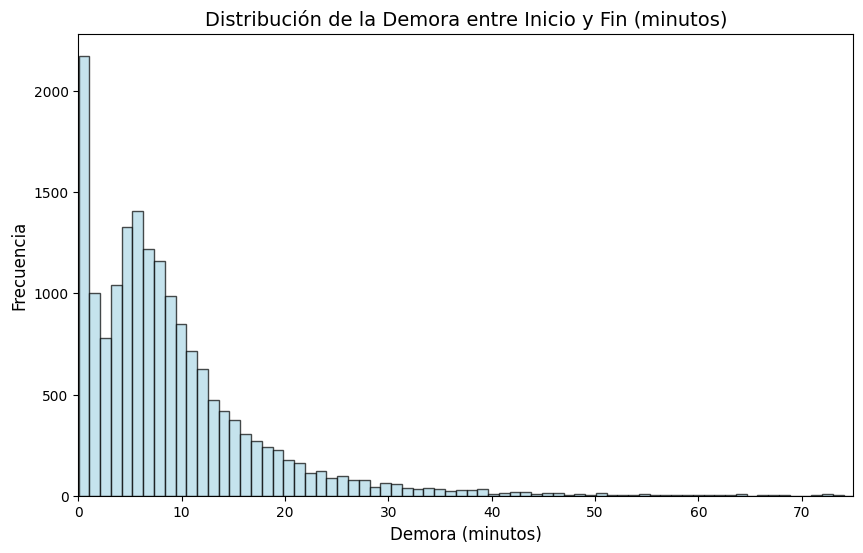

In [13]:
df_filtrado = df[df['Demora_Inicio_Fin'] > 0]
plt.figure(figsize=(10,6))
plt.hist(df_filtrado['Demora_Inicio_Fin'], bins=375, color='lightblue', alpha=0.7, edgecolor='black')
plt.title('Distribución de la Demora entre Inicio y Fin (minutos)', fontsize=14)
plt.xlabel('Demora (minutos)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlim(0, 75)
plt.show()

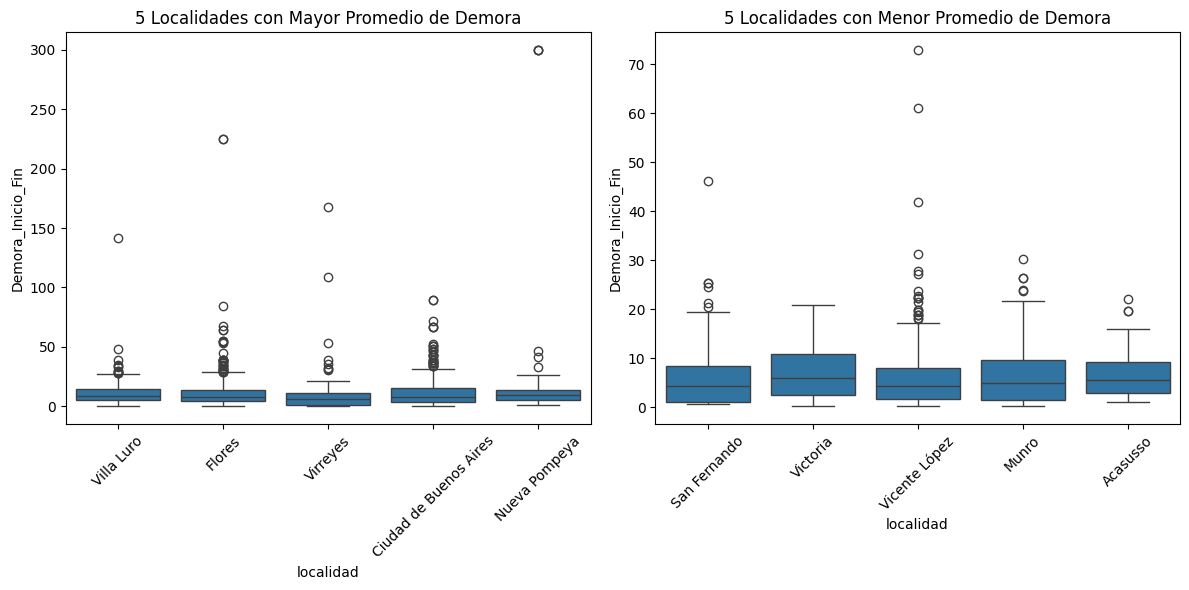

In [14]:
# Paso 1: Filtrar localidades con al menos 20 registros
conteo_localidades = df_filtrado['localidad'].value_counts()
localidades_con_mas_20_registros = conteo_localidades[conteo_localidades >= 20].index

# Filtrar el dataframe para quedarnos solo con las localidades con al menos 20 registros
df_filtrado_20 = df_filtrado[df_filtrado['localidad'].isin(localidades_con_mas_20_registros)]

# Paso 2: Agrupar por localidad y calcular el promedio de la demora
promedio_demora = df_filtrado_20.groupby('localidad')['Demora_Inicio_Fin'].mean().reset_index()

# Paso 3: Seleccionar las 5 localidades con mayor y menor promedio de demora
top_5_localidades_mayor = promedio_demora.nlargest(5, 'Demora_Inicio_Fin')
top_5_localidades_menor = promedio_demora.nsmallest(5, 'Demora_Inicio_Fin')

# Paso 4: Filtrar los datos originales para incluir solo las localidades seleccionadas
df_mayor_demora = df_filtrado_20[df_filtrado_20['localidad'].isin(top_5_localidades_mayor['localidad'])]
df_menor_demora = df_filtrado_20[df_filtrado_20['localidad'].isin(top_5_localidades_menor['localidad'])]

# Paso 5: Crear los dos boxplots
plt.figure(figsize=(12, 6))

# Boxplot para las 5 localidades con mayor demora
plt.subplot(1, 2, 1)
sns.boxplot(x='localidad', y='Demora_Inicio_Fin', data=df_mayor_demora)
plt.xticks(rotation=45)
plt.title('5 Localidades con Mayor Promedio de Demora')

# Boxplot para las 5 localidades con menor demora
plt.subplot(1, 2, 2)
plt.xticks(rotation=45)
sns.boxplot(x='localidad', y='Demora_Inicio_Fin', data=df_menor_demora)
plt.title('5 Localidades con Menor Promedio de Demora')

plt.tight_layout()
plt.show()

Parece haber una mayor dispersion de demora promedio en las localidades con menor demora que aquellas localidades con más

Veamos la demora promedio por localidad

C:\Users\PC\AppData\Local\Temp\ipykernel_1152\464189147.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Demora_Inicio_Fin', y='localidad', data=promedio_demora, palette='viridis')


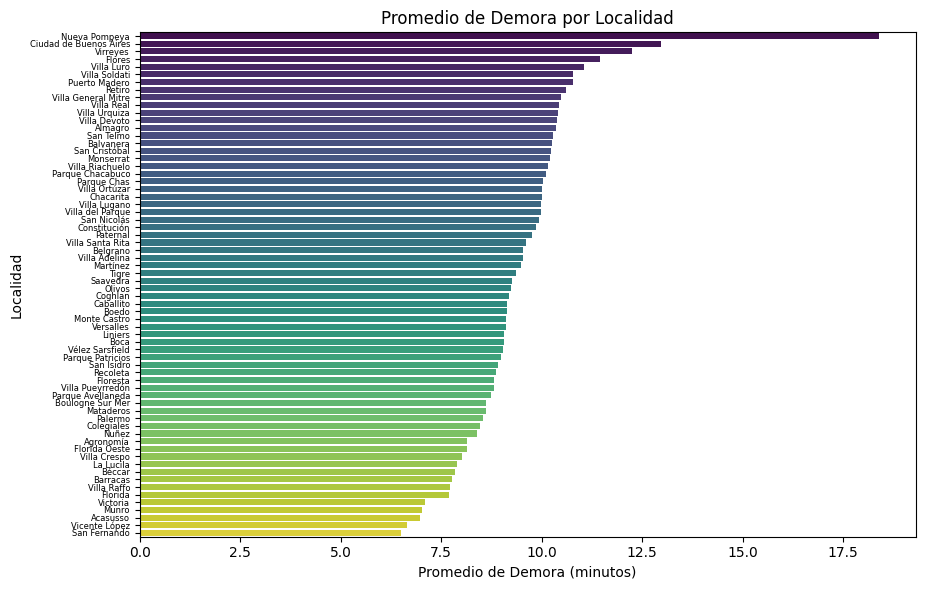

In [15]:
# Calcular el promedio de demora por localidad
promedio_demora = df_filtrado_20.groupby('localidad')['Demora_Inicio_Fin'].mean().reset_index()

# Ordenar las localidades de mayor a menor promedio de demora
promedio_demora = promedio_demora.sort_values(by='Demora_Inicio_Fin', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Demora_Inicio_Fin', y='localidad', data=promedio_demora, palette='viridis')

# Personalizar el gráfico
plt.title('Promedio de Demora por Localidad')
plt.xlabel('Promedio de Demora (minutos)')
plt.ylabel('Localidad')

plt.tight_layout()
plt.yticks(fontsize=6)  # Ajusta el tamaño de la fuente aquí
plt.show()

¿Cuales son las localidades con más demoras atipicas?

C:\Users\PC\AppData\Local\Temp\ipykernel_1152\961643605.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='porcentaje_outliers', y='localidad', data=outliers_df, palette='viridis')


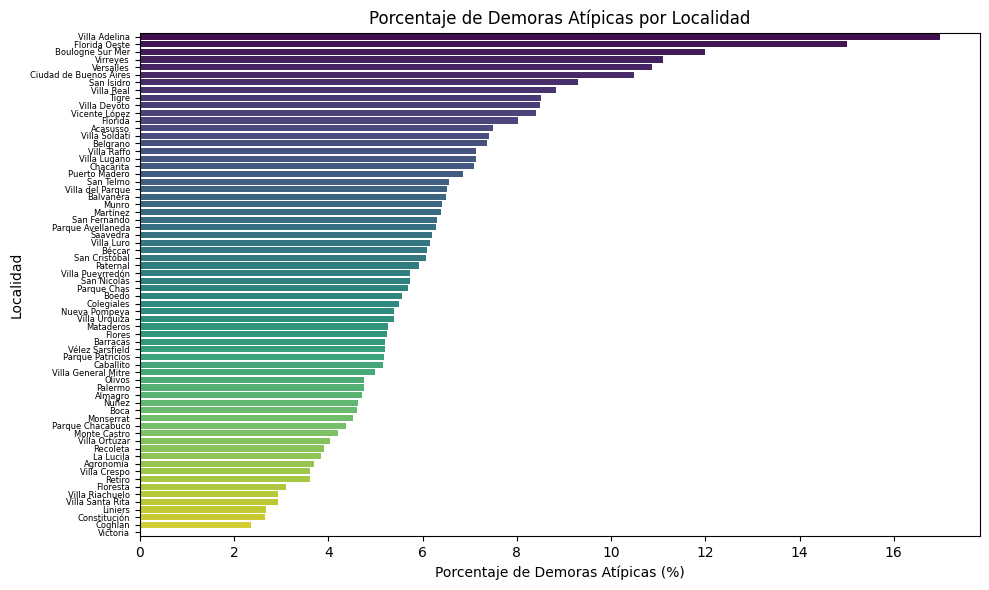

In [16]:
outliers_count = []

# Calcular IQR y determinar los outliers para cada localidad
for localidad in df_filtrado_20['localidad'].unique():
    datos_localidad = df_filtrado_20[df_filtrado_20['localidad'] == localidad]['Demora_Inicio_Fin']
    
    # Calcular el primer y tercer cuartil y el IQR
    Q1 = datos_localidad.quantile(0.25)
    Q3 = datos_localidad.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determinar los límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Contar los outliers
    outliers = datos_localidad[(datos_localidad < limite_inferior) | (datos_localidad > limite_superior)]
    
    # Calcular el porcentaje de outliers
    total_entregas = len(datos_localidad)
    porcentaje_outliers = len(outliers) / total_entregas * 100
    
    outliers_count.append({
        'localidad': localidad,
        'outliers': len(outliers),
        'total_entregas': total_entregas,
        'porcentaje_outliers': porcentaje_outliers
    })

# Crear un DataFrame con la cantidad y porcentaje de outliers por localidad
outliers_df = pd.DataFrame(outliers_count)

# Paso 3: Ordenar el DataFrame por el porcentaje de outliers de mayor a menor
outliers_df = outliers_df.sort_values(by='porcentaje_outliers', ascending=False)

# Paso 4: Graficar el porcentaje de outliers por localidad
plt.figure(figsize=(10, 6))
sns.barplot(x='porcentaje_outliers', y='localidad', data=outliers_df, palette='viridis')
plt.title('Porcentaje de Demoras Atípicas por Localidad')
plt.xlabel('Porcentaje de Demoras Atípicas (%)')
plt.ylabel('Localidad')

# Reducir el tamaño de la fuente de las etiquetas en el eje y
plt.yticks(fontsize=6)

plt.tight_layout()
plt.show()

¿Hay alguna relacion entre la demora promedio y el porcentaje de demoras atipicas?

C:\Users\PC\AppData\Local\Temp\ipykernel_1152\618918031.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Demora_Inicio_Fin', y='porcentaje_outliers', data=df_combinado, palette='viridis', s=100)


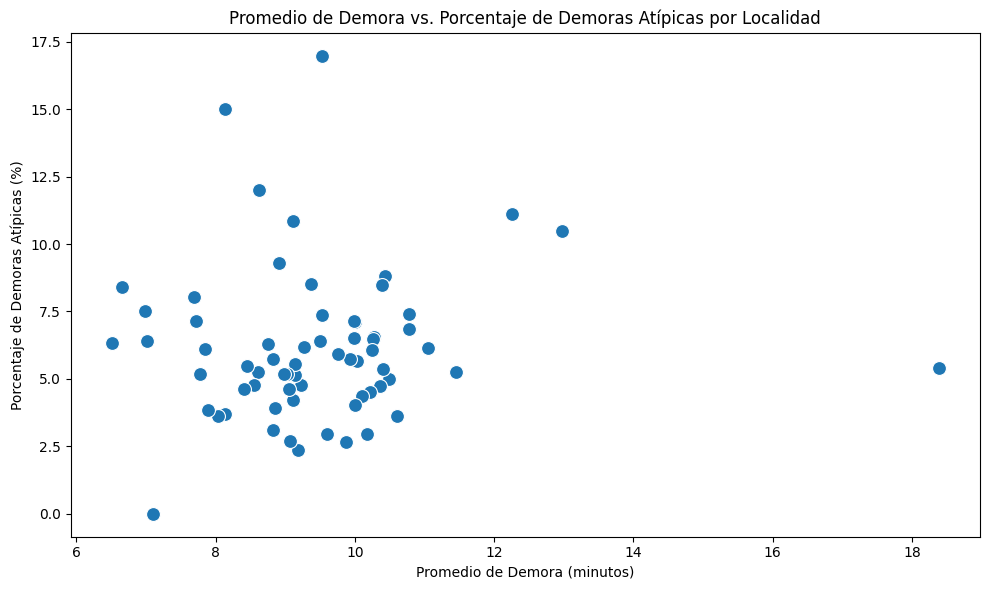

In [17]:
df_combinado = pd.merge(promedio_demora, outliers_df[['localidad', 'porcentaje_outliers']], on='localidad')

# Crear el scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Demora_Inicio_Fin', y='porcentaje_outliers', data=df_combinado, palette='viridis', s=100)

# Personalizar el gráfico
plt.title('Promedio de Demora vs. Porcentaje de Demoras Atípicas por Localidad')
plt.xlabel('Promedio de Demora (minutos)')
plt.ylabel('Porcentaje de Demoras Atípicas (%)')

plt.tight_layout()

plt.show()

- La mayoria de localidades tiene promedio de demora entre 8 y 12 minutos
- Algunas localidades por mas que tengan promedio de demora baja, presentan alta varibilidad en las demoras
- El grafico no sugiere una relacion lineal entre el promedio de demora y la cantidad de demoras atipicas

Estudiemos la demora por clientes

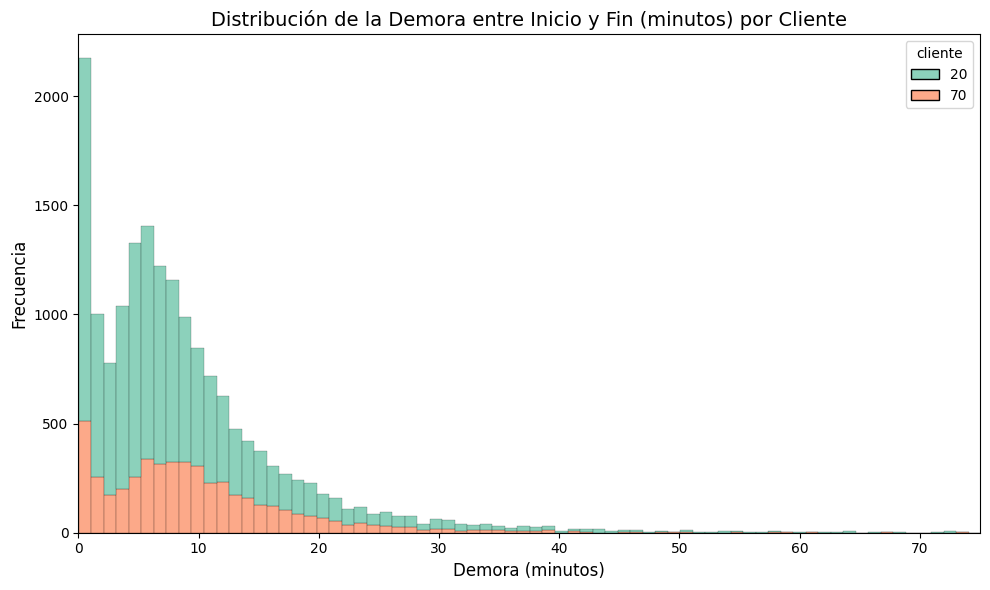

In [18]:
# Filtrar el dataframe para valores de 'Demora_Inicio_Fin' mayores a 0
df_filtrado = df[df['Demora_Inicio_Fin'] > 0]

# Graficar el histograma con diferentes colores por cliente
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtrado, x='Demora_Inicio_Fin', hue='cliente', 
             bins=375, palette='Set2', multiple='stack', edgecolor='black')

# Configuración del gráfico
plt.title('Distribución de la Demora entre Inicio y Fin (minutos) por Cliente', fontsize=14)
plt.xlabel('Demora (minutos)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlim(0, 75)  # Limitar el eje x hasta 75 minutos

# Mostrar el gráfico
plt.tight_layout()
plt.show()

¿Qué porcentaje de las entregas no tuvieron demora por cada cliente?

C:\Users\PC\AppData\Local\Temp\ipykernel_1152\468041047.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cliente', y='porcentaje', data=df_porcentajes, palette='viridis')


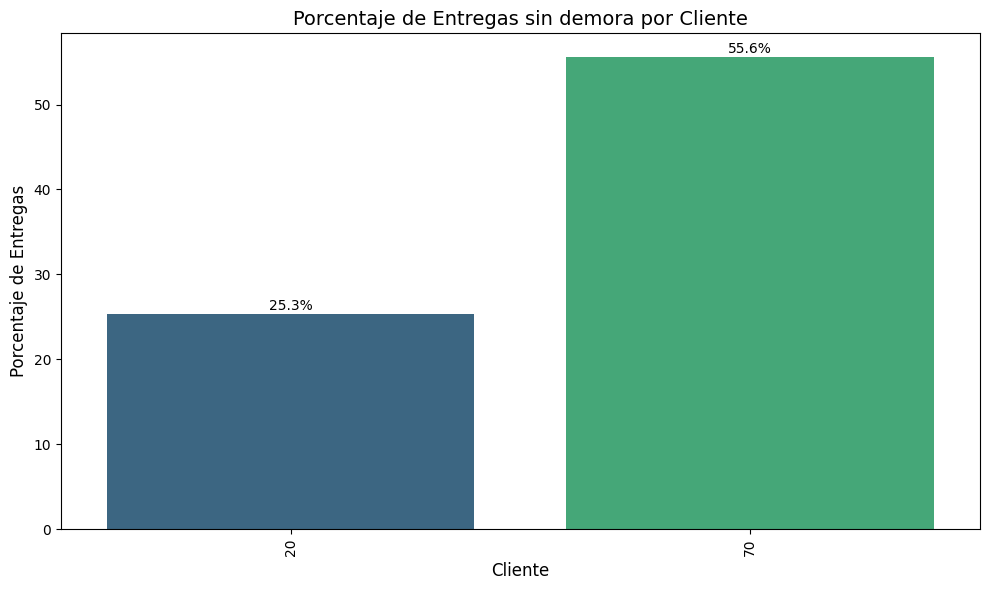

In [20]:
# Paso 1: Calcular el total de entregas por cliente
total_entregas_por_cliente = df.groupby('cliente').size().reset_index(name='total_entregas')

# Paso 2: Calcular las entregas con Demora_Inicio_Fin = 0 por cliente
entregas_cero_por_cliente = df[df['Demora_Inicio_Fin'] == 0].groupby('cliente').size().reset_index(name='entregas_cero')

# Paso 3: Unir ambos DataFrames para tener total de entregas y entregas con demora cero
df_porcentajes = pd.merge(entregas_cero_por_cliente, total_entregas_por_cliente, on='cliente')

# Paso 4: Calcular el porcentaje de entregas con demora = 0
df_porcentajes['porcentaje'] = (df_porcentajes['entregas_cero'] / df_porcentajes['total_entregas']) * 100

# Paso 5: Graficar el porcentaje de entregas con demora = 0 por cliente
plt.figure(figsize=(10, 6))
sns.barplot(x='cliente', y='porcentaje', data=df_porcentajes, palette='viridis')

# Agregar los porcentajes en las barras
for index, row in df_porcentajes.iterrows():
    plt.text(index, row.porcentaje + 0.5, f'{row.porcentaje:.1f}%', ha='center', fontsize=10)

# Configuración del gráfico
plt.title('Porcentaje de Entregas sin demora por Cliente', fontsize=14)
plt.xlabel('Cliente', fontsize=12)
plt.ylabel('Porcentaje de Entregas', fontsize=12)
plt.xticks(rotation=90)  # Rotar las etiquetas de los clientes si hay muchos

# Mostrar el gráfico
plt.tight_layout()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_1152\1731050797.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='cliente', y='porcentaje', data=df_porcentajes, palette=['#8eb440', '#8f8f9f'])


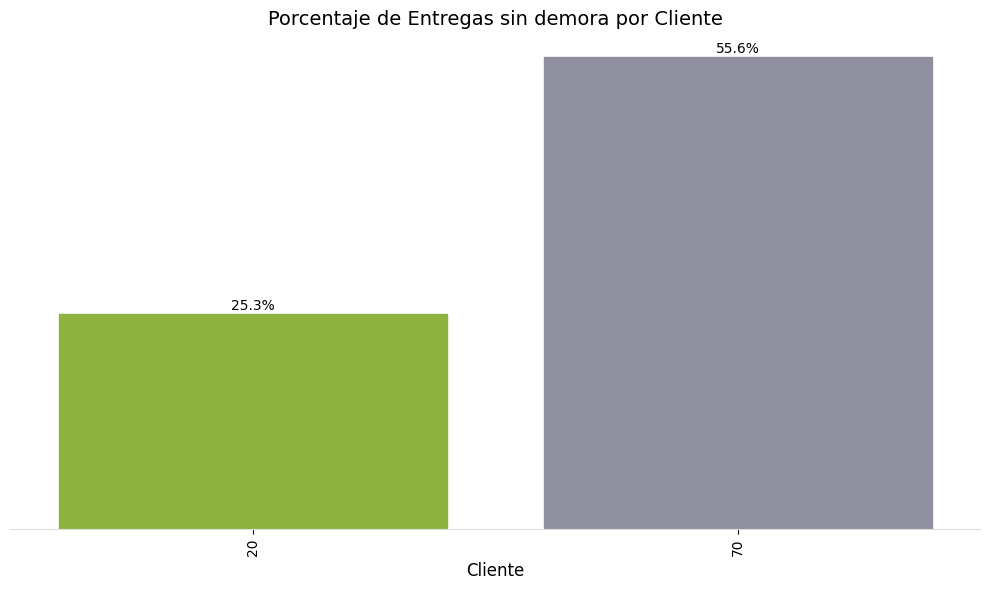

In [21]:
# Crear el gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='cliente', y='porcentaje', data=df_porcentajes, palette=['#8eb440', '#8f8f9f'])

# Cambiar colores manualmente para cada barra
colors = ['#8eb440', '#8f8f9f']
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i % len(colors)])  # Alternar colores si hay más de dos clientes

# Agregar los porcentajes en las barras
for index, row in df_porcentajes.iterrows():
    ax.text(index, row.porcentaje + 0.5, f'{row.porcentaje:.1f}%', ha='center', fontsize=10)

# Personalización de la apariencia
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(False)

# Configuración del gráfico
ax.set_title('Porcentaje de Entregas sin demora por Cliente', fontsize=14)
ax.set_xlabel('Cliente', fontsize=12)
ax.set_ylabel('')
plt.xticks(rotation=90)  # Rotar las etiquetas de los clientes si hay muchos

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El cliente 20, que tiene mas pedidos que el otro cliente, tiene un 25% de entregas sin demora. Mientras que el cliente 70 la mitad de los pedidos se entregan sin demora

¿Cuales son las 3 localidades con mayor demora de cada cliente?

C:\Users\PC\AppData\Local\Temp\ipykernel_12704\865954392.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_localidades_por_cliente = promedio_por_localidad_cliente.groupby('cliente').apply(


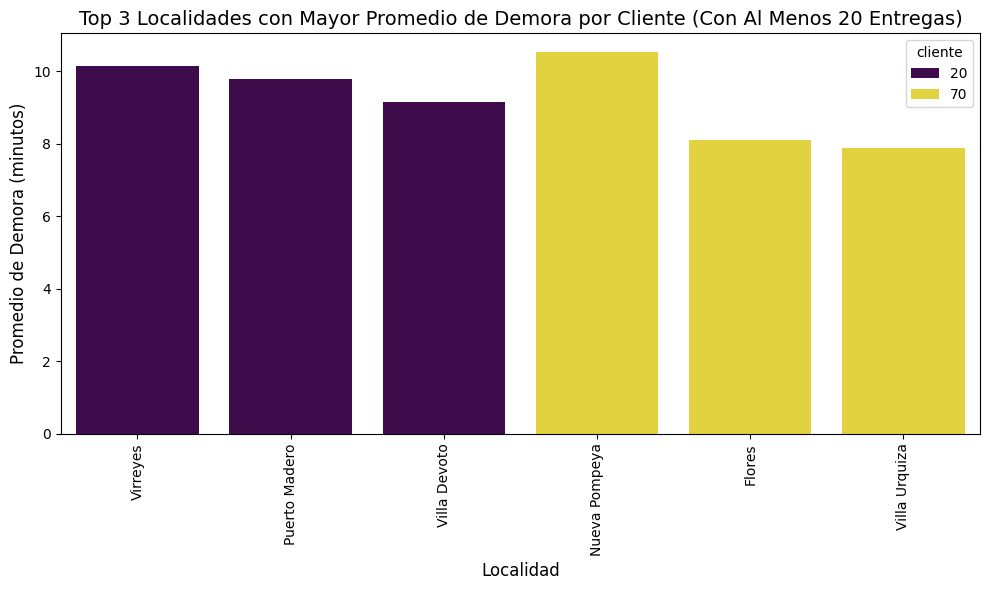

In [71]:
# Paso 1: Contar el número de entregas por localidad y cliente
conteo_por_localidad_cliente = df.groupby(['localidad', 'cliente']).size().reset_index(name='total_entregas')

# Paso 2: Filtrar las combinaciones con al menos 20 entregas
localidades_con_20_entregas = conteo_por_localidad_cliente[conteo_por_localidad_cliente['total_entregas'] >= 20]

# Paso 3: Calcular el promedio de demora por localidad y cliente para las localidades filtradas
df_filtrado = df.merge(localidades_con_20_entregas[['localidad', 'cliente']], on=['localidad', 'cliente'])
promedio_por_localidad_cliente = df_filtrado.groupby(['localidad', 'cliente'])['Demora_Inicio_Fin'].mean().reset_index()

# Paso 4: Seleccionar las 3 localidades con mayor promedio de demora por cliente
top_3_localidades_por_cliente = promedio_por_localidad_cliente.groupby('cliente').apply(
    lambda x: x.nlargest(3, 'Demora_Inicio_Fin')).reset_index(drop=True)

# Paso 5: Graficar los resultados
plt.figure(figsize=(10, 6))
sns.barplot(x='localidad', y='Demora_Inicio_Fin', hue='cliente', data=top_3_localidades_por_cliente, palette='viridis')

# Configuración del gráfico
plt.title('Top 3 Localidades con Mayor Promedio de Demora por Cliente (Con Al Menos 20 Entregas)', fontsize=14)
plt.xlabel('Localidad', fontsize=12)
plt.ylabel('Promedio de Demora (minutos)', fontsize=12)
plt.xticks(rotation=90)  # Rotar las etiquetas de las localidades si es necesario

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Las localidades con mas demoras de cada cliente difieren, pero tiene un promedio de demora similar

¿Habrá alguna explicacion de la demora en los bultos, peso o unidades?

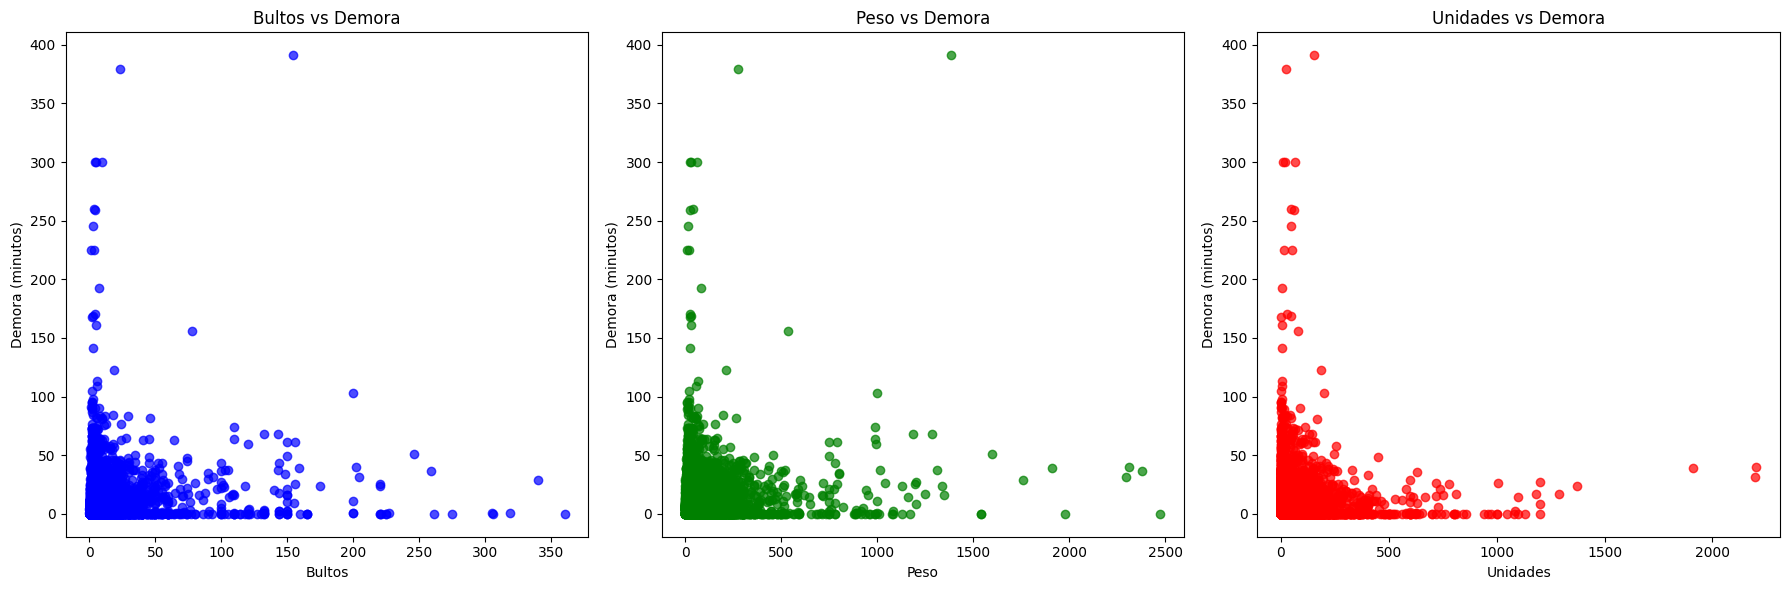

In [72]:
# Crear una figura con 3 subplots (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Primer gráfico: Bultos vs Demora
axes[0].scatter(df_filtrado['Bultos'], df_filtrado['Demora_Inicio_Fin'], color='blue', alpha=0.7)
axes[0].set_xlabel('Bultos')
axes[0].set_ylabel('Demora (minutos)')
axes[0].set_title('Bultos vs Demora')

# Segundo gráfico: Peso vs Demora
axes[1].scatter(df_filtrado['Peso'], df_filtrado['Demora_Inicio_Fin'], color='green', alpha=0.7)
axes[1].set_xlabel('Peso')
axes[1].set_ylabel('Demora (minutos)')
axes[1].set_title('Peso vs Demora')

# Tercer gráfico: Unidades vs Demora
axes[2].scatter(df_filtrado['Unidades'], df_filtrado['Demora_Inicio_Fin'], color='red', alpha=0.7)
axes[2].set_xlabel('Unidades')
axes[2].set_ylabel('Demora (minutos)')
axes[2].set_title('Unidades vs Demora')

# Ajustar el layout para que no se solapen los títulos y etiquetas
plt.tight_layout()

# Mostrar los gráficos
plt.show()

No se ve ninguna relacion de las variables unidades, peso y bulto con la demora

Estudiemos la demora por dias

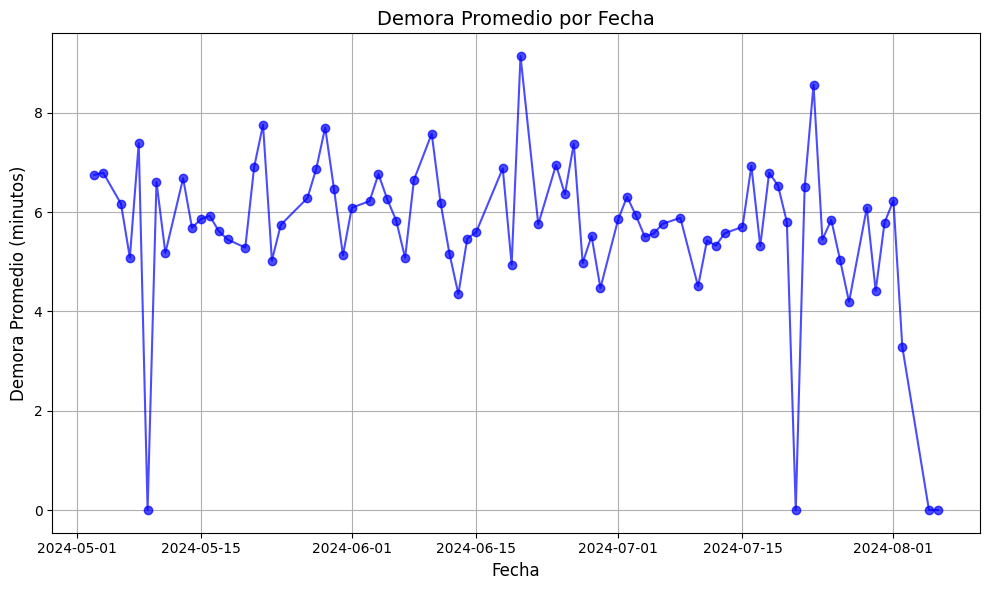

In [73]:
# Asegúrate de que la columna de fecha esté en formato datetime
df['VisitaFecha'] = pd.to_datetime(df['VisitaFecha'])

# Paso 1: Calcular el promedio de demora por fecha
promedio_demora_fecha = df.groupby('VisitaFecha')['Demora_Inicio_Fin'].mean().reset_index()

# Paso 2: Graficar la serie de tiempo
plt.figure(figsize=(10, 6))
plt.plot(promedio_demora_fecha['VisitaFecha'], promedio_demora_fecha['Demora_Inicio_Fin'], marker='o', color='b', alpha=0.7)

# Configuración del gráfico
plt.title('Demora Promedio por Fecha', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Demora Promedio (minutos)', fontsize=12)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

¿Algún día de la semana tiene una mayor demora promedio?

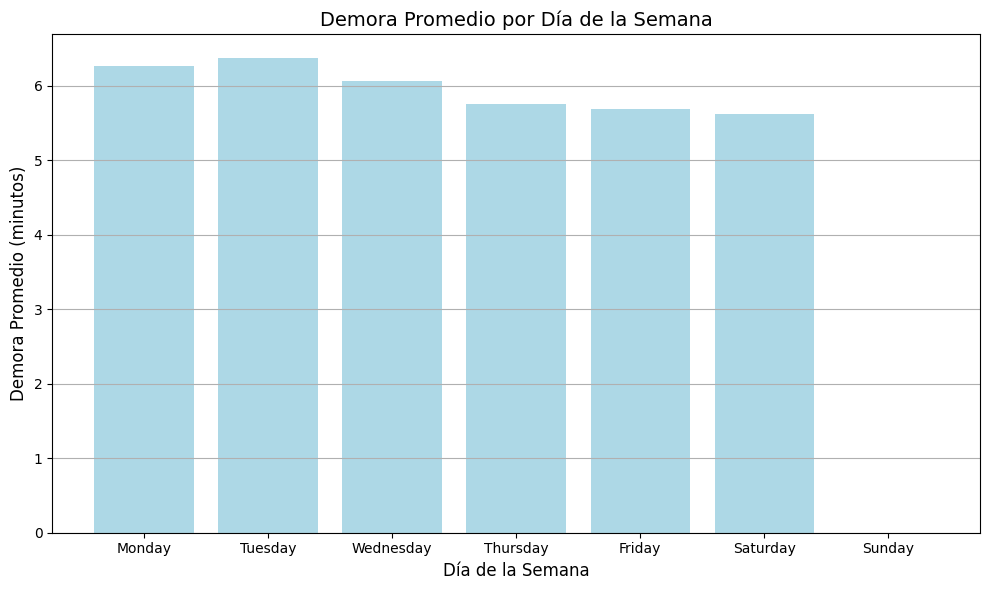

In [74]:
# Asegúrate de que la columna de fecha esté en formato datetime
df_filtrado['VisitaFecha'] = pd.to_datetime(df_filtrado['VisitaFecha'])

# Paso 1: Crear una columna para el día de la semana (lunes = 0, domingo = 6)
df_filtrado['DiaSemana'] = df_filtrado['VisitaFecha'].dt.day_name()

# Paso 2: Calcular el promedio de demora por día de la semana
promedio_demora_dia = df_filtrado.groupby('DiaSemana')['Demora_Inicio_Fin'].mean().reset_index()

# Paso 3: Ordenar los días de la semana en el orden correcto
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
promedio_demora_dia['DiaSemana'] = pd.Categorical(promedio_demora_dia['DiaSemana'], categories=dias_orden, ordered=True)
promedio_demora_dia = promedio_demora_dia.sort_values('DiaSemana')

# Paso 4: Graficar la demora promedio por día de la semana
plt.figure(figsize=(10, 6))
plt.bar(promedio_demora_dia['DiaSemana'], promedio_demora_dia['Demora_Inicio_Fin'], color='lightblue')

# Configuración del gráfico
plt.title('Demora Promedio por Día de la Semana', fontsize=14)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Demora Promedio (minutos)', fontsize=12)
plt.grid(True, axis='y', alpha=1)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Por hora planificada y sin outliers

C:\Users\PC\AppData\Local\Temp\ipykernel_12704\659323029.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_outliers['hora_Planificada_unico'] = df_sin_outliers['VisitaPlanificadaHora'].dt.hour
C:\Users\PC\AppData\Local\Temp\ipykernel_12704\659323029.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hora_Planificada_unico', y='Demora_Inicio_Fin', data=demora_promedio_por_hora_planificada, palette='viridis')


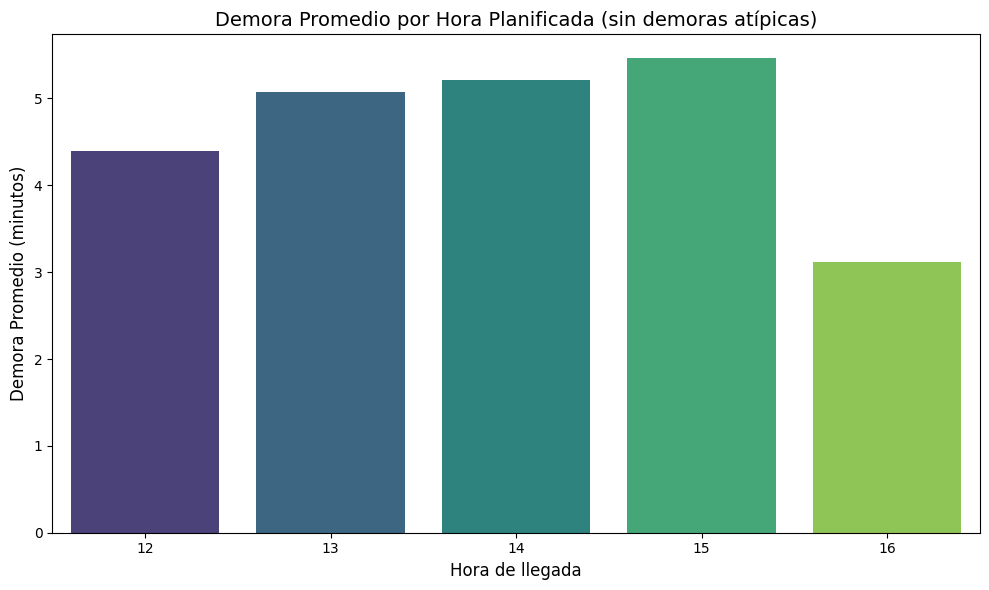

In [81]:
# Paso 1: Calcular el IQR para identificar demoras atípicas
Q1 = df_filtrado['Demora_Inicio_Fin'].quantile(0.25)
Q3 = df_filtrado['Demora_Inicio_Fin'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar las demoras dentro de los límites (sin outliers)
df_sin_outliers = df_filtrado[(df_filtrado['Demora_Inicio_Fin'] >= limite_inferior) & (df_filtrado['Demora_Inicio_Fin'] <= limite_superior)]

# Paso 2: Extraer la hora de 'VisitaHora_Inicio' (hora real) y guardarla en una nueva columna 'hora_Real_unico'
df_sin_outliers['hora_Planificada_unico'] = df_sin_outliers['VisitaPlanificadaHora'].dt.hour

# Paso 3: Calcular la demora promedio por cada hora real sin outliers
demora_promedio_por_hora_planificada = df_sin_outliers.groupby('hora_Planificada_unico')['Demora_Inicio_Fin'].mean().reset_index()

# Paso 4: Graficar la demora promedio por hora real
plt.figure(figsize=(10, 6))
sns.barplot(x='hora_Planificada_unico', y='Demora_Inicio_Fin', data=demora_promedio_por_hora_planificada, palette='viridis')
plt.title('Demora Promedio por Hora Planificada (sin demoras atípicas)', fontsize=14)
plt.xlabel('Hora de llegada', fontsize=12)
plt.ylabel('Demora Promedio (minutos)', fontsize=12)
plt.tight_layout()
plt.show()

Hay una disminucion considerable de demora promedio en aquellas entregas con horario planificado de entrega a las 16

Por hora real de llegada y sin outliers

C:\Users\PC\AppData\Local\Temp\ipykernel_12704\1993820193.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_outliers['hora_Real_unico'] = df_sin_outliers['VisitaHora_Inicio'].dt.hour
C:\Users\PC\AppData\Local\Temp\ipykernel_12704\1993820193.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hora_Real_unico', y='Demora_Inicio_Fin', data=demora_promedio_por_hora_real, palette='viridis')


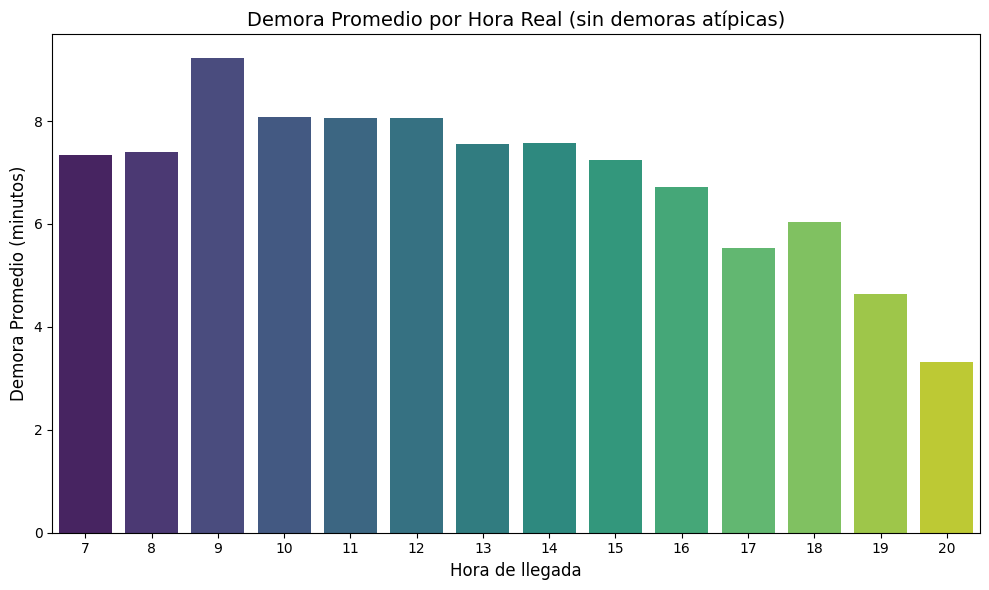

In [44]:
# Paso 1: Calcular el IQR para identificar demoras atípicas (ya calculado arriba)

# Paso 2: Extraer la hora de 'VisitaHora_Inicio' (hora real) y guardarla en una nueva columna 'hora_Real_unico'
df_sin_outliers['hora_Real_unico'] = df_sin_outliers['VisitaHora_Inicio'].dt.hour

# Paso 3: Calcular la demora promedio por cada hora real sin outliers
demora_promedio_por_hora_real = df_sin_outliers.groupby('hora_Real_unico')['Demora_Inicio_Fin'].mean().reset_index()

# Paso 4: Graficar la demora promedio por hora real
plt.figure(figsize=(10, 6))
sns.barplot(x='hora_Real_unico', y='Demora_Inicio_Fin', data=demora_promedio_por_hora_real, palette='viridis')
plt.title('Demora Promedio por Hora Real (sin demoras atípicas)', fontsize=14)
plt.xlabel('Hora de llegada', fontsize=12)
plt.ylabel('Demora Promedio (minutos)', fontsize=12)
plt.tight_layout()
plt.show()

El grafico sugiere que a partir de las 13 hay una tendencia decreciente de la demora

Analizemos correlaciones

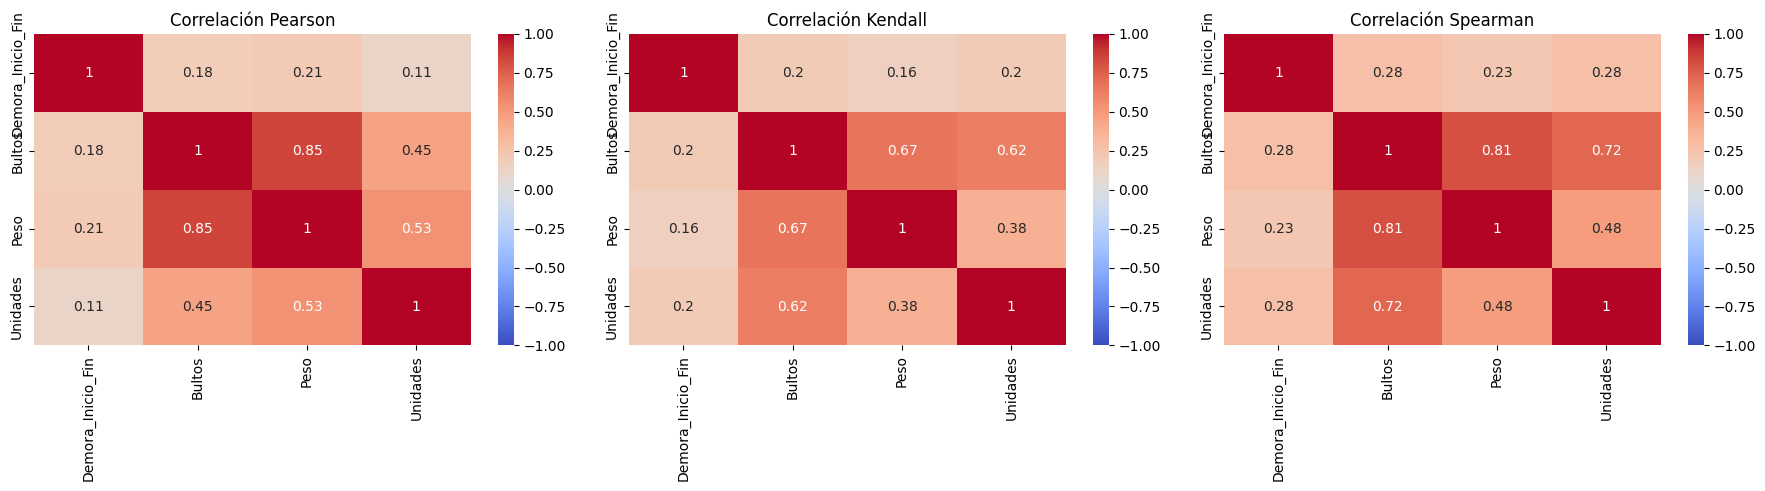

In [29]:
# Calcular correlación de Pearson (ya la tienes calculada, pero por referencia la dejamos aquí)
corr_pearson = df_filtrado[['Demora_Inicio_Fin', 'Bultos', 'Peso', 'Unidades']].corr(method='pearson')

# Calcular correlación de Kendall
corr_kendall = df_filtrado[['Demora_Inicio_Fin', 'Bultos', 'Peso', 'Unidades']].corr(method='kendall')

# Calcular correlación de Spearman
corr_spearman = df_filtrado[['Demora_Inicio_Fin', 'Bultos', 'Peso', 'Unidades']].corr(method='spearman')

# Graficar heatmaps

# Crear figura para los tres gráficos
plt.figure(figsize=(18, 5))

# Pearson
plt.subplot(1, 3, 1)
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación Pearson')

# Kendall
plt.subplot(1, 3, 2)
sns.heatmap(corr_kendall, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación Kendall')

# Spearman
plt.subplot(1, 3, 3)
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación Spearman')

# Ajustar el espaciado
plt.tight_layout()
plt.show()

### Mapas Interactivos

Veamos geograficamente por cantidad de repartos

In [109]:
# Agrupar por localidad y calcular la cantidad total de repartos y las coordenadas promedio
repartos_por_localidad = df.groupby('localidad').agg({
        'latitud': 'mean',
        'longitud': 'mean',
        'localidad': 'size'
    }).rename(columns={'localidad': 'cantidad_repartos'}).reset_index()

# Crear el mapa centrado en Buenos Aires
m = folium.Map(location = [-34.603722, -58.381592], zoom_start = 12)

# Paso 1: Crear el HeatMap con todas las coordenadas de los repartos
heat_data = df[['latitud', 'longitud']].values.tolist()  # Coordenadas individuales de los repartos

# Añadir el HeatMap
HeatMap(heat_data, 
        min_opacity=0.3,  
        max_opacity=0.8,  
        radius=25,        
        blur=15,          
        gradient={        
            0.1: 'blue',    
            0.4: 'green',   
            0.7: 'yellow',  
            1.0: 'red'      
        }).add_to(m)

# Paso 2: Definir el color de los círculos en función de la cantidad de repartos
# Usaremos un esquema de colores basado en una escala
def color_for_repartos(cantidad_repartos):
    if cantidad_repartos < 100:
        return 'white'
    elif cantidad_repartos < 500:
        return 'yellow'
    elif cantidad_repartos < 1000:
        return 'orange'
    else:
        return 'red'

# Paso 3: Añadir un círculo con el color adecuado en cada localidad y mostrar el número de repartos en el popup
for i, row in repartos_por_localidad.iterrows():
    color = color_for_repartos(row['cantidad_repartos'])
    folium.CircleMarker(
        location    = [row['latitud'], row['longitud']],
        radius      = 10,  # Tamaño del círculo
        popup       = f"Localidad: {row['localidad']}<br>Cantidad de repartos: {row['cantidad_repartos']}",
        color       = "black",  # Color del borde del círculo según cantidad de repartos
        fill        = True,
        fill_color  = color,  # Color de relleno del círculo
        fill_opacity= 1.0
    ).add_to(m)

# Guardar el mapa en un archivo HTML
m.save("heatmap_por_localidad_colores_ajustados.html")

# Mostrar el mapa (si estás en Jupyter Notebook)
m

Veamos geograficamente por demora promedio (sin outliers)

In [110]:
# Calcular el IQR para identificar los outliers en la columna 'Demora_Inicio_Fin'
Q1 = df['Demora_Inicio_Fin'].quantile(0.25)
Q3 = df['Demora_Inicio_Fin'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers (valores fuera de los límites)
df_sin_outliers = df[(df['Demora_Inicio_Fin'] >= lower_bound) & (df['Demora_Inicio_Fin'] <= upper_bound)]

# Agrupar por localidad y calcular la demora promedio y las coordenadas promedio
demora_promedio_por_localidad = df_sin_outliers.groupby('localidad').agg({
        'latitud': 'mean',
        'longitud': 'mean',
        'Demora_Inicio_Fin': 'mean'  # Calcular la demora promedio sin outliers
    }).reset_index()

# Crear el mapa centrado en Buenos Aires
m = folium.Map(location = [-34.603722, -58.381592], zoom_start = 12)

# Paso 1: Crear el HeatMap con todas las coordenadas de los repartos
heat_data = df_sin_outliers[['latitud', 'longitud']].values.tolist()  # Coordenadas individuales de los repartos

# Añadir el HeatMap
HeatMap(heat_data, 
        min_opacity=0.3,  
        max_opacity=0.8,  
        radius=25,        
        blur=15,          
        gradient={        
            0.1: 'blue',    
            0.4: 'green',   
            0.7: 'yellow',  
            1.0: 'red'      
        }).add_to(m)

# Paso 2: Definir el color de los círculos en función de la demora promedio
def color_for_demora(demora_promedio):
    if demora_promedio < 4:
        return 'green'  # Baja demora
    elif demora_promedio < 7:
        return 'yellow'  # Demora media
    elif demora_promedio < 11:
        return 'orange'  # Alta demora
    else:
        return 'red'  # Demora muy alta

# Paso 3: Añadir un círculo con el color adecuado en cada localidad y mostrar la demora promedio en el popup
for i, row in demora_promedio_por_localidad.iterrows():
    color = color_for_demora(row['Demora_Inicio_Fin'])
    folium.CircleMarker(
        location    = [row['latitud'], row['longitud']],
        radius      = 10,  # Tamaño del círculo
        popup       = f"Localidad: {row['localidad']}<br>Demora promedio: {row['Demora_Inicio_Fin']:.2f} minutos",
        color       = "black",  # Color del borde del círculo
        fill        = True,
        fill_color  = color,  # Color de relleno del círculo
        fill_opacity= 1.0
    ).add_to(m)

# Guardar el mapa en un archivo HTML
m.save("heatmap_por_localidad_demora_promedio_sin_outliers.html")

# Mostrar el mapa (si estás en Jupyter Notebook)
m

Ahora por porcentaje de demoras atipicas

In [111]:
# Paso 1: Identificar los outliers en la columna 'Demora_Inicio_Fin' utilizando el IQR
Q1 = df['Demora_Inicio_Fin'].quantile(0.25)
Q3 = df['Demora_Inicio_Fin'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los repartos con demoras atípicas (outliers)
df['demora_atipica'] = (df['Demora_Inicio_Fin'] < lower_bound) | (df['Demora_Inicio_Fin'] > upper_bound)

# Paso 2: Agrupar por localidad y calcular el porcentaje de repartos con demoras atípicas
repartos_con_demora_atipica = df.groupby('localidad').agg({
    'latitud': 'mean',
    'longitud': 'mean',
    'demora_atipica': 'mean'  # Proporción de repartos con demoras atípicas
}).reset_index()

# Calcular el porcentaje de repartos con demoras atípicas
repartos_con_demora_atipica['porcentaje_demora_atipica'] = repartos_con_demora_atipica['demora_atipica'] * 100

# Crear el mapa centrado en Buenos Aires
m = folium.Map(location = [-34.603722, -58.381592], zoom_start = 12)

# Paso 3: Crear el HeatMap con las coordenadas de los repartos (sin cambios)
heat_data = df[['latitud', 'longitud']].values.tolist()  # Coordenadas individuales de los repartos

# Añadir el HeatMap
HeatMap(heat_data, 
        min_opacity=0.3,  
        max_opacity=0.8,  
        radius=25,        
        blur=15,          
        gradient={        
            0.1: 'blue',    
            0.4: 'green',   
            0.7: 'yellow',  
            1.0: 'red'      
        }).add_to(m)

# Paso 4: Definir el color de los círculos en función del porcentaje de repartos con demoras atípicas
def color_for_porcentaje_demora(porcentaje_demora_atipica):
    if porcentaje_demora_atipica < 4:
        return 'green'  # Bajo porcentaje
    elif porcentaje_demora_atipica < 8:
        return 'yellow'  # Porcentaje medio
    elif porcentaje_demora_atipica < 12:
        return 'orange'  # Alto porcentaje
    else:
        return 'red'  # Muy alto porcentaje

# Paso 5: Añadir un círculo con el color adecuado en cada localidad y mostrar el porcentaje de repartos con demoras atípicas en el popup
for i, row in repartos_con_demora_atipica.iterrows():
    color = color_for_porcentaje_demora(row['porcentaje_demora_atipica'])
    folium.CircleMarker(
        location    = [row['latitud'], row['longitud']],
        radius      = 10,  # Tamaño del círculo
        popup       = f"Localidad: {row['localidad']}<br>Porcentaje de repartos con demoras atípicas: {row['porcentaje_demora_atipica']:.2f}%",
        color       = "black",  # Color del borde del círculo
        fill        = True,
        fill_color  = color,  # Color de relleno del círculo
        fill_opacity= 1.0
    ).add_to(m)

# Guardar el mapa en un archivo HTML
m.save("heatmap_por_localidad_porcentaje_demora_atipica.html")

# Mostrar el mapa (si estás en Jupyter Notebook)
m

In [13]:
from IPython.display import display, HTML
import webbrowser
import os

# Ruta al archivo .html
ruta_html = 'heatmap_por_localidad_colores_ajustados.html'
# Asegúrate de que la ruta sea absoluta
ruta_absoluta = os.path.abspath(ruta_html)

# Abrir el archivo HTML en el navegador
webbrowser.open('file://' + ruta_absoluta)

True

test